In [3]:
%pip install yfinance


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/7d/76/31fb9c58398f4cbdde4a0831d0407a1ca987fe828c7da9ce80969014a5a1/yfinance-0.2.40-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 2.0 MB/s eta 0:00:02
     -- ------------------------------------- 0.2/3.0 MB 2.6 MB/s eta 0:00:02
     ------- -------------------------------- 0.5/3.0 MB 4.1 MB/s eta 0:00:01
     ---------------- ----------------------- 1.2/3.0 MB 

In [43]:
import yfinance as yf
import pandas as pd

In [44]:
sp500 = yf.Ticker("^GSPC") # pulls S&P 500 index fund

In [45]:
sp500 = sp500.history(period='max') # queries all history of the data for the index fund

In [46]:
sp500 # non-trading days data are not included

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-02 00:00:00-04:00,5461.839844,5509.689941,5458.430176,5509.009766,3329950000,0.0,0.0
2024-07-03 00:00:00-04:00,5507.439941,5539.270020,5507.419922,5537.020020,2179470000,0.0,0.0
2024-07-05 00:00:00-04:00,5537.910156,5570.330078,5531.629883,5567.189941,3253080000,0.0,0.0


In [47]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-06-25 00:00:00-04:00', '2024-06-26 00:00:00-04:00',
               '2024-06-27 00:00:00-04:00', '2024-06-28 00:00:00-04:00',
               '2024-07-01 00:00:00-04:00', '2024-07-02 00:00:00-04:00',
               '2024-07-03 00:00:00-04:00', '2024-07-05 00:00:00-04:00',
               '2024-07-08 00:00:00-04:00', '2024-07-09 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24245, freq=None)

<Axes: xlabel='Date'>

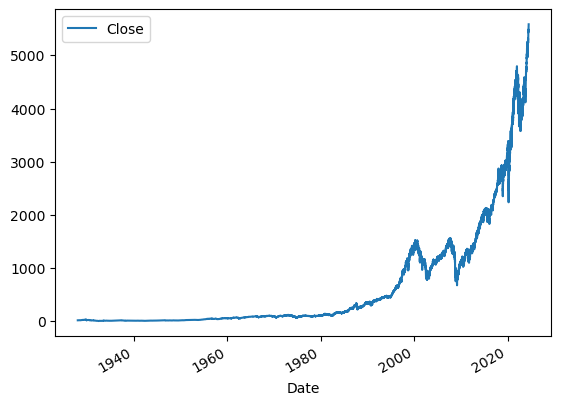

In [48]:
sp500.plot.line(y='Close', use_index=True)

In [49]:
del sp500['Dividends']
del sp500['Stock Splits']
# irrelevant columns for this index fund

In [50]:
sp500['Tomorrow'] = sp500['Close'].shift(-1)

In [51]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-07-02 00:00:00-04:00,5461.839844,5509.689941,5458.430176,5509.009766,3329950000,5537.020020
2024-07-03 00:00:00-04:00,5507.439941,5539.270020,5507.419922,5537.020020,2179470000,5567.189941
2024-07-05 00:00:00-04:00,5537.910156,5570.330078,5531.629883,5567.189941,3253080000,5572.850098


In [52]:
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int) # returns a 1 or 0 based on if tomrrow is greater

In [53]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-07-02 00:00:00-04:00,5461.839844,5509.689941,5458.430176,5509.009766,3329950000,5537.020020,1
2024-07-03 00:00:00-04:00,5507.439941,5539.270020,5507.419922,5537.020020,2179470000,5567.189941,1
2024-07-05 00:00:00-04:00,5537.910156,5570.330078,5531.629883,5567.189941,3253080000,5572.850098,1


In [54]:
sp500 = sp500.loc['1990-01-01':].copy() # removes all data before 1990
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-07-02 00:00:00-04:00,5461.839844,5509.689941,5458.430176,5509.009766,3329950000,5537.020020,1
2024-07-03 00:00:00-04:00,5507.439941,5539.270020,5507.419922,5537.020020,2179470000,5567.189941,1
2024-07-05 00:00:00-04:00,5537.910156,5570.330078,5531.629883,5567.189941,3253080000,5572.850098,1


In [55]:
from sklearn.ensemble import RandomForestClassifier # Random Forest can pick up non-linear relationships
# go back and add in optimization loop for the estimator and sample split
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100] # all rows but last 100 rows
test = sp500.iloc[-100:] # last 100 rows

predictors = ['Close', 'High', 'Low', 'Volume', 'Open']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [56]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

In [57]:
precision_score(test['Target'], preds) # score is not great (57% correct)

1.0

<Axes: xlabel='Date'>

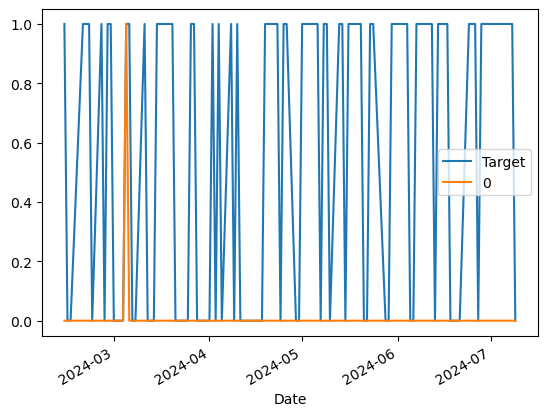

In [58]:
combined = pd.concat([test['Target'], preds], axis=1)
combined.plot()

### Building a backtesting system

In [59]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [60]:
def backtest(data, model, predictors, start=2500, step=250): # around 250 trading days in a year: uses 10 years of data to predict one year
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [61]:
predictions = backtest(sp500, model, predictors)

In [62]:
predictions['Predictions'].value_counts() # see how many times market was predicted to go up or down

Predictions
0    3575
1    2620
Name: count, dtype: int64

In [63]:
precision_score(predictions['Target'], predictions['Predictions']) # 53% accuracy

0.5293893129770992

In [64]:
predictions['Target'].value_counts() / predictions.shape[0] # this will give percentage of days that market went up

Target
1    0.535432
0    0.464568
Name: count, dtype: float64

### Add more predictors to model

In [65]:
horizons = [2, 5, 60, 250, 1000] # these are horizons to look at rolling means
# last trading day (2), last week (5), last 3 months or so (60), last year (250), last 4 years (1000)
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean() # calculates rolling average for number of days (horizon amount)
    
    ratio_column = f'Close_Ratio_{horizon}' # ratio for closing (higher number means close was higher than the average)
    sp500[ratio_column] = sp500['Close'] / rolling_averages['Close']
    
    trend_column = f'Trend_{horizon}'
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()['Target'] # calculates rolling sum for number of days (horizon amount) that stock price actually went up
    
    new_predictors += [ratio_column, trend_column]

In [66]:
sp500 = sp500.dropna()

In [67]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01 00:00:00-04:00,5471.080078,5479.549805,5446.529785,5475.089844,3488760000,5509.009766,1,1.001336,1.0,1.000358,4.0,1.042198,35.0,1.142306,140.0,1.291851,530.0
2024-07-02 00:00:00-04:00,5461.839844,5509.689941,5458.430176,5509.009766,3329950000,5537.020020,1,1.003088,2.0,1.005098,4.0,1.047643,35.0,1.148365,141.0,1.299142,530.0
2024-07-03 00:00:00-04:00,5507.439941,5539.270020,5507.419922,5537.020020,2179470000,5567.189941,1,1.002536,2.0,1.008033,4.0,1.051854,36.0,1.153122,142.0,1.305014,531.0


### Update Model

In [68]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [69]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict_proba(test[predictors])[:,1] # predicts probability stock price will go up or down tomorrow (adding [:,1] looks for just up)
    preds[preds >= .6] = 1 # changes percentage needed for price to be considered going up from 50% to 60%
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [70]:
predictions = backtest(sp500, model, new_predictors)

In [71]:
predictions['Predictions'].value_counts()

Predictions
0.0    4356
1.0     838
Name: count, dtype: int64

In [72]:
# above shows that there are less days where the model is predicting the price to go up which hopefully increases accuracy
# aka: less trading days, but more accurate trading days

In [73]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5751789976133651